# Titanic - Machine Learning from Disater (Kaggle Competition)

## QUESTION AND PROBLEM DEFINITION

**Question -  What sorts of people were more likely to survive?**

The question or problem definition for Titanic Survival competition is followed:

*   Knowing from a training dataset that passengers who survived or did not survive in the Titanic disaster;
*   Fitting a model determine based on a given testing dataset not containing the survival information, if these passengers in the testing dataset survived or not.

Some early understanding about the problem is developed by the description on the Kaggle competition Description page. Here are the highlights to note.

*   On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew (32% survival rate);
*   One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew;
*   Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.



## LOAD PACKAGES

The following Python Pandas packages help us work with datasets in this project.

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier

# Filter all warnings. 
import warnings
warnings.filterwarnings('ignore')

## ACQUIRE DATA

We start by acquiring the training and testing datasets into Pandas dataframes.

In [2]:
# Open the local files
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [3]:
# Load local files as pandas dataframe
train = pd.read_csv(r'train.csv')
test = pd.read_csv(r'test.csv')
combine = [train,test]

## ANALYZE BY DESCRIBING DATA

Pandas also helps describe the datasets answering following questions early in the project.



**Which features are available in the dataset?**

Noting the feature names for directly manipulating or analyzing these. These feature names are as followed:

In [4]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


Let's preview the data.

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**What are the data types for various features?**

Helping us during converting goal.

*   Integer or float: seven features in training dataset, six features in testing dataset;
*   String(object): five features in both training and testing datasets.

In [6]:
train.info()
print('-'*40) # Draw the seperate line
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

**Which features are categorical?**

These values classify the samples into sets of similar samples. Within categorical features are the values nomial, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plot for visualization.

*  Categorical: Survived, Sex, and Embarked;
*  Ordinal: Pclass.

**Which features are numerical?**

Within numerical features are the values discrete, continuous, or timeseries based. Among other things this helps us select the appropraite plots for visualization.

*   Continuous: Age, Fare;
*   Discrete: SibSp, Parch.

**Which features are mixed data types?**

Some features are alphanumeric data which are the mix of letters and numbers. Moreover, the mix of numeric and alphanumeric data exist within same feature. These are candidates for correcting goal.

*  Mix of numeric and alphanumeric: Ticket;
*  Alphanumeric: Cabin.

*  Cabin > Age > Fare are incomplete in case of testing dataset.

**What is the distribution of numerical features?**

This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

* Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224);
*  Survived is a categorical feature with 0 or 1 values;
*  About 38% samples survived representative of the actual survival rate at 32%;
*  Most passengers (>75%) did not travel with parents or children;
*  Nearly 30% of the passengers had siblings and/or spouse aboard;
*  Fare varied significantly with few passengers paying as high as $512;
*  Few elderly passengers (<1%) within age range 65-80.

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
print(train['Parch'].describe(percentiles=[.75,.8]))
print('-'*30)
print(train['SibSp'].describe(percentiles=[.68,.69]))
print('-'*30)
print(train['Fare'].describe(percentiles=[ .9, .99]))
print('-'*30)
train['Age'].describe(percentiles=[.9, .99])

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
50%        0.000000
75%        0.000000
80%        1.000000
max        6.000000
Name: Parch, dtype: float64
------------------------------
count    891.000000
mean       0.523008
std        1.102743
min        0.000000
50%        0.000000
68%        0.000000
69%        1.000000
max        8.000000
Name: SibSp, dtype: float64
------------------------------
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
50%       14.454200
90%       77.958300
99%      249.006220
max      512.329200
Name: Fare, dtype: float64
------------------------------


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
50%       28.000000
90%       50.000000
99%       65.870000
max       80.000000
Name: Age, dtype: float64

**What is the distribution of categorical features?**

*  Names are unique across the dataset (count=unique=891);
*  Sex are two possible values with 65% male (top=male, freq=557/count=891);
*  Cabin values have several duplicates across samples. Alternatively several passengers shared a cabin;
*  Embarked takes three possible values. S port used by most passengers (top=S);
*  Ticket has high ratio (22%) of duplicate values (unique=681)

In [9]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Celotti, Mr. Francesco",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


**Which features may contain errors or typos?**

This is harder to review for a large dataset; however, reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting.

*  Name. Name feature may contain errors or typos as there are several ways used to descirbe a name including titles, round brackets, and quotes used for alternative or short names.

**Which features contain blank, null or empty values?**

These will require correcting.
* Cabin > Age > Embarked features contain a number of null values in that order for the training dataset;

In [10]:
# Check for nulls for the training dataset
null_check_train = train.isnull().sum()
null_check_train

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

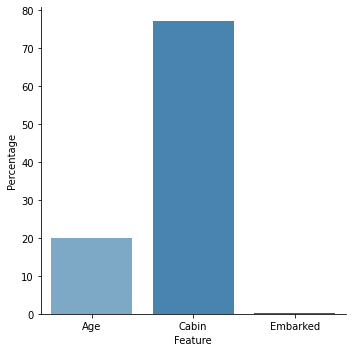

19.87 % of data in Age feature are missing.
77.1 % of data in Cabin feature are missing.
0.22 % of data in Embarked feature are missing.


In [11]:
# Show the nulls in Age, Cabin, and Embarked variables in percentage
null_age_train_percent = round(null_check_train['Age']/(len(train['Age'])/100),2)
null_cabin_train_percent = round(null_check_train['Cabin']/(len(train['Cabin'])/100),2)
null_embarked_train_percent = round(null_check_train['Embarked']/(len(train['Embarked'])/100),2)
# The bar plot of missing values in percentage for train dataset
df_null_train = pd.DataFrame({'Feature':['Age','Cabin','Embarked'],
                              'Percentage':[null_age_train_percent,
                                            null_cabin_train_percent,
                                            null_embarked_train_percent]})
sns.catplot(x='Feature',y='Percentage',kind='bar', data=df_null_train,palette="Blues_d")
plt.show()

print(null_age_train_percent,'% of data in Age feature are missing.')
print(null_cabin_train_percent,'% of data in Cabin feature are missing.')
print(null_embarked_train_percent,'% of data in Embarked feature are missing.')

In [12]:
# Check for nulls for the test dataset
null_check_test = test.isnull().sum()
null_check_test

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

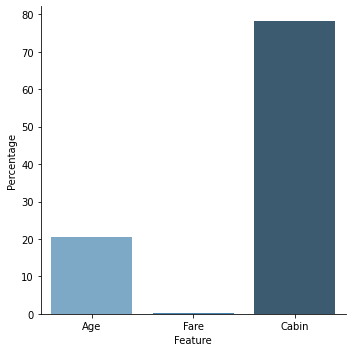

20.57 % of data in Age feautre are missing.
0.24 % of data in Embarked feature are missing.
78.23 % of data in Cabin feature are missing.


In [13]:
# Show the nulls in Age, Fare, and Cabin variables in percentage
null_age_test_percent = round(null_check_test['Age']/(len(test['Age'])/100),2)
null_fare_test_percent = round(null_check_test['Fare']/(len(test['Fare'])/100),2)
null_cabin_test_percent = round(null_check_test['Cabin']/(len(test['Cabin'])/100),2)
# The bar plot of missing values in percentage for test dataset
df_null_test = pd.DataFrame({'Feature':['Age','Fare','Cabin'],
                              'Percentage':[null_age_test_percent,
                                            null_fare_test_percent,
                                            null_cabin_test_percent]})
sns.catplot(x='Feature',y='Percentage',kind='bar', data=df_null_test,palette="Blues_d")
plt.show()

print(null_age_test_percent,'% of data in Age feautre are missing.')
print(null_fare_test_percent,'% of data in Embarked feature are missing.')
print(null_cabin_test_percent,'% of data in Cabin feature are missing.')

## ASSUMPTIONS BASED ON DATA ANALYSIS

We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

**Correlating**

We want to know how well each feature correlates with Survived. We want to do this early in the project and match these quick correlations with modelled correlations later in the project.

**Completing**

1.   We may want to complete Age feature as it is definitely correlated to Survived;
2.   We may want to complete Embarked feature as it may also correlate with Survived or other important feature.





**Correcting**

1.  PassengerId may be dropped from training dataset as it doesn't contribute to Survived;
2.  Cabin feature may be dropped as it is higly incomplete or contains many null values both in training and testing datasets;
3.  Ticket feature may be dropped from the analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and Survived;
4.  Name feature is relatively non-standard, may not contribute directly to Survived, so maybe droped.

**Creating**

1.  We may want to create a new feature called FamilySize based on Parch and SibSp to get total count of family membered on board;
2.  We may want to engineer the Name feature to extract Title as a new feature;
3.  We may want to create new feature for Age bands. This turns a continuous numerical feature into an ordinal categorical feature;
4.  We may also want to create a Fare range feature if it helps our analysis.

**Classifying**

We may also add to our assumptions based on the problem description noted earlier.

1.  Women (Sex=female) were more likely to have survived;
2.  Children (Age<4) were more likely to have survived;
3.  The upper-class passengers (Pclass=1) were more likely to have survived.

## ANALYZE BY PIVOTING FEATURES

To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also make sense doing so only for features which  ordinal (Pclass), categorical (Sex) or discrete (SibSp, Parch) type.

*  **Pclass.** We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.
 

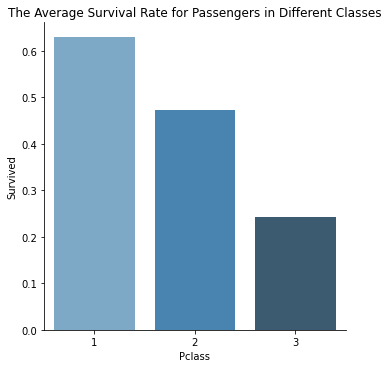

In [14]:
pclass_sort = train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)
pclass_plot = sns.catplot(x='Pclass',y='Survived',kind='bar',data=pclass_sort, palette = "Blues_d")
pclass_plot.set(title="The Average Survival Rate for Passengers in Different Classes")
plt.xticks(rotation=0)
plt.show()


*  **Sex.** We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).




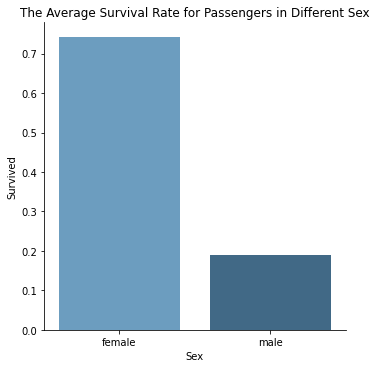

In [15]:
sex_sort = train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)
sex_plot = sns.catplot(x='Sex',y='Survived',kind='bar',data=sex_sort, palette = "Blues_d")
sex_plot.set(title="The Average Survival Rate for Passengers in Different Sex")
plt.xticks(rotation=0)
plt.show()

*  **SibSp and Parch.** These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features.

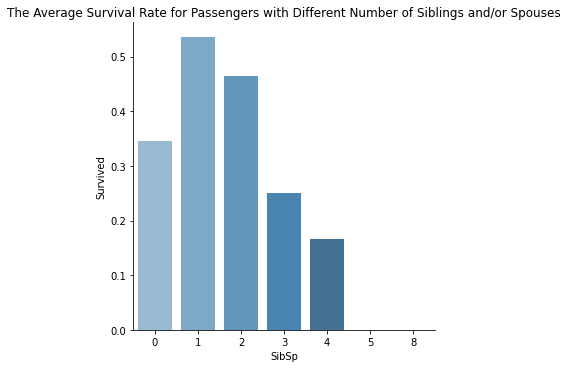

In [16]:
sibsp_sort = train[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)
sibsp_plot = sns.catplot(x='SibSp',y='Survived',kind='bar',data=sibsp_sort, palette = "Blues_d")
sibsp_plot.set(title="The Average Survival Rate for Passengers with Different Number of Siblings and/or Spouses")
plt.xticks(rotation=0)
plt.show()

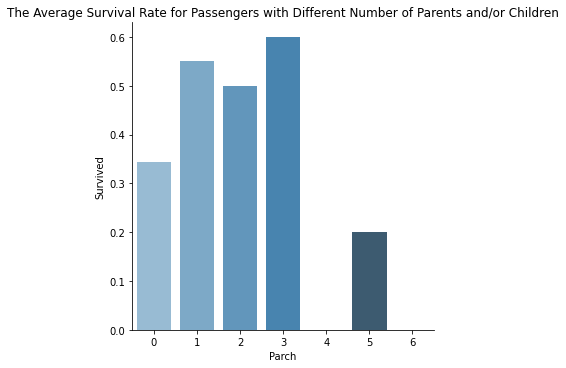

In [17]:
parch_sort = train[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)
parch_plot = sns.catplot(x='Parch',y='Survived',kind='bar',data=parch_sort, palette = "Blues_d")
parch_plot.set(title="The Average Survival Rate for Passengers with Different Number of Parents and/or Children")
plt.xticks(rotation=0)
plt.show()

## ANALYZE BY VISUALIZING DATA

Now we can continue confirming some of our assumptions using visualization for analyzing the data.

###Correlating numerical features

Let's start by understnding correlations between numerical features and our solution goal (Survived).

A histogram chart is useful for analyzing continuous numerical variables like Age where banding or ranges will help identify useful patterns. The historgram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer question realting to specific bands (Did infants have better chance to survive?)

Note that x-axis in histogram visualizations represents the count of samples or passengers.

**Observations**

*  Infant (Age<=4) had high survival rate;
*  Oldest passenger (Age=80) survived;
*  Large number of 15-25 year olds did not survive;
*  Most passengers are in 15-35 age range.

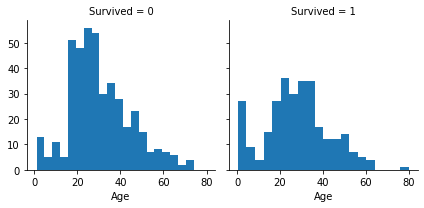

In [18]:
hist_age = sns.FacetGrid(train,col='Survived')
hist_age.map(plt.hist,'Age',bins=20)

**Decisions**

This simple analysis confirms our assumptions as decisions for subsequent workflow stages.

*  We should consider Age (our assumption classifying #2) in our model training;
*  We should complete the Age features for null values (completing #1);
*  We should band age groups (creating #3).

### Correlating numerical and ordinal features


We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

**Observations**

*  Pclass=3 had most passengers; however, most did not survive, which confirms our classifying assumption #3;
*  Infant passengers in Pclass=2 and Pclass=3 mostly survived, which qualifies our classifying assumption #2;
*  Most passengers in Pclass=1 survived, which confirms our classifying assumption #3.


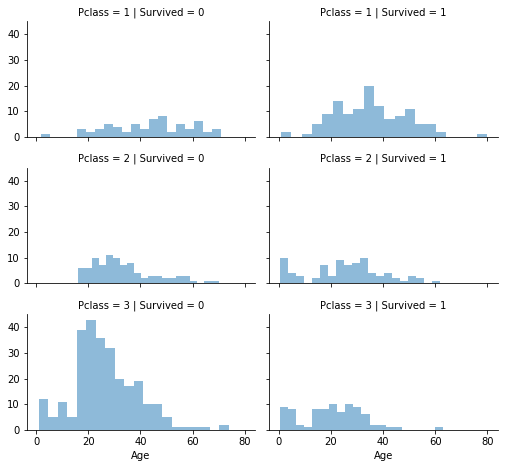

In [19]:
hist_pclass = sns.FacetGrid(train, col='Survived', row = 'Pclass', size=2.2, aspect = 1.6)
hist_pclass.map(plt.hist, 'Age', alpha = .5, bins=20)
hist_pclass.add_legend()

**Decisions**

Consider Pclass for model training.

###Correlating categorical features

Now we can correlate categorical features with our solution goal.

**Observations**

*  Female passengers had much better survival rate than males, which confirms classifying #1;
*  Exception in Embarked=C where male had higher survival rate. This could be a correlation between Pclass and Embarked and Pclass and Survived, not necessarily direct correlation between Embarked and Survived;
* Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports, which indicates completeing #2.

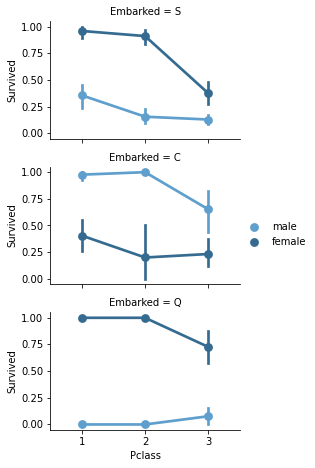

In [20]:
point_embarked = sns.FacetGrid(train,row='Embarked',size=2.2, aspect=1.6)
point_embarked.map(sns.pointplot,'Pclass','Survived','Sex',palette='Blues_d')
point_embarked.add_legend()

**Decision**

*  Add Sex feature to model training;
*  Complete and add Embarked feature to model training.

### Correlating categorical and numerical features

We may also want to correlate categorical features (with non-numeric values) and numeric features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Numeric continuous), with Survived (Categorical numeric).

**Observations**

*  Higher fare paying passengers had better survival rate, which confirms our assumption for creating #4 fare ranges;
*  Port of embarkation correlates with survival rates, which confirms correlating #1 and completing #2.

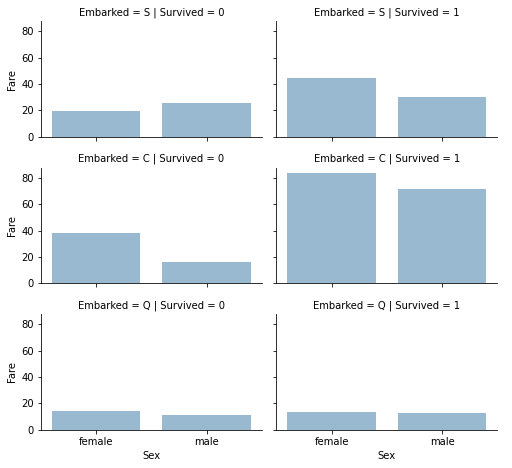

In [21]:
bar_embarked = sns.FacetGrid(train,row='Embarked',col='Survived',size=2.2, aspect=1.6)
bar_embarked.map(sns.barplot, 'Sex','Fare',alpha=0.5, ci=None)
bar_embarked.add_legend()

**Decisions**

Consider banding Fare features.

## WRANGLE DATA

We have collected several assumptions and decisions regarding our datasets and solution requirements. So far we did not have to change a single feature or value to arrive at these. Let's now execute our decisions and assumptions for correcting, creating, and completing goals.

### Converting a categorical feature

Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.

Let's start by converting Sex feature to a new Sex feature where female=1 and male=0.

In [22]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train = combine[0]
test = combine[1]

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


### Completing a numerical continuous feature

Now we should start estimating and completing features with missing or null values. We will first do this for the Age feature.

We can consider three methods to complete a numerical continuous feature.

1.  A simple way is to generate random numbers between mean and standard deviation;
2.  More accurate way of guessing missing values is to use other corrletated features. In this project, we note correlation among Age, Sex, and Pclass. Guess Age values using median values for Age across sets of Pclass and Sex feature combinations.So, median Age for Pclass=1 and Sex=0, Pclass=1 and Sex=1, and so on.
3.  Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between means and standard deviation, based onsets of Pclass and Sex combinations.

Methods 1 and 3 will introduce random noise into our models. The results from multiple executions might vary, so we will prefer method 2.

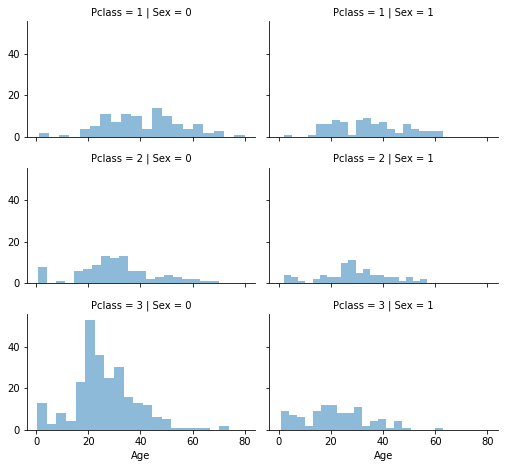

In [24]:
# female=1 and male=0
hist_age = sns.FacetGrid(train, row='Pclass', col='Sex', size=2.2, aspect=1.6)
hist_age.map(plt.hist,'Age',alpha=0.5,bins=20)
hist_age.add_legend()

Let's start by preparing an empty array to contain guessed Age values based on Pclass x Sex combintions.

In [25]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Now we iterate over Sex (0 or 1) and Pclass (1,2,3) to calculate guessed values of Age for the six combinations.

In [26]:
for dataset in combine:
  for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
  for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),
                    'Age'] = guess_ages[i,j]

  dataset['Age'] = dataset['Age'].astype(int)

In [27]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S


In [28]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22,1,1,3101298,12.2875,NaN,S


Let's create Age bands and determine correlations with Survived.

In [29]:
train['AgeBand'] = pd.cut(train['Age'],5)

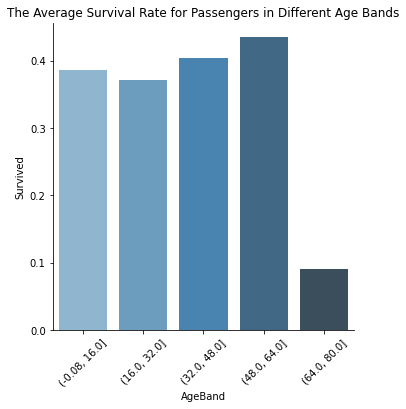

In [30]:
ageband_sort = train[['AgeBand','Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand',ascending=True)
ageband_sort_plot = sns.catplot(x='AgeBand',y='Survived',kind='bar', data=ageband_sort,palette="Blues_d")
ageband_sort_plot.set(title="The Average Survival Rate for Passengers in Different Age Bands")
plt.xticks(rotation=45)
plt.show()

Let's replace Age with ordinals based on these bands.

In [31]:
for dataset in combine:
  dataset.loc[dataset['Age']<=16, 'Age'] = 0
  dataset.loc[(dataset['Age']>16) & (dataset['Age']<=32),'Age'] = 1
  dataset.loc[(dataset['Age']>32) & (dataset['Age']<=48),'Age'] = 2
  dataset.loc[(dataset['Age']>48) & (dataset['Age']<=64),'Age'] = 3
  dataset.loc[dataset['Age']>64,'Age'] = 4


In [32]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,S,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,C,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,S,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,S,"(32.0, 48.0]"


We can remove the AgeBand feature.

In [33]:
train = train.drop(['AgeBand'],axis=1)
combine = [train,test]

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,S


### Completing a categorical feature

Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

In [35]:
max_freq_port = train.Embarked.dropna().mode()[0] # mode(): Single mode (most common value) of discrete or nominal data
max_freq_port

'S'

In [36]:
for dataset in combine:
  dataset['Embarked']=dataset['Embarked'].fillna(max_freq_port)

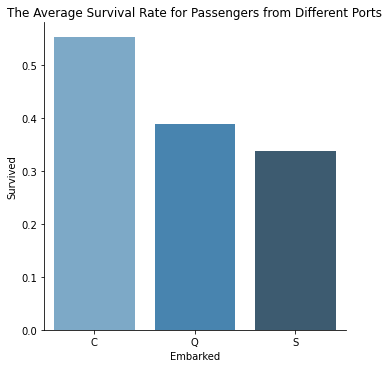

In [37]:
embarked_sort = train[['Embarked','Survived']].groupby(['Embarked']).mean().sort_values(by='Survived',ascending=False)
embarked_sort['Embarked'] = embarked_sort.index
embarked_sort_plot = sns.catplot(x='Embarked',y='Survived',kind='bar', data=embarked_sort,palette="Blues_d")
embarked_sort_plot.set(title="The Average Survival Rate for Passengers from Different Ports")
plt.xticks(rotation=0)
plt.show()

### Converting categorical feature to numeric

We can now convert the EmbarkedFill feature by creating a new numeric Port feature.

In [38]:
for dataset in combine:
  dataset['Embarked'] = dataset['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

In [39]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0


### Completing and converting a numeric feature

We can now complete the Fare feature for single missing value in testing dataset using mode to get the value that occurs most frequently for this feature.

Note that we are not creating an intermediate new feature or doing any further analysis for correlation to guess missing feature as we are replacing only a single value. The completion goal achieves desired requirement for model algorithm to operate on non-null values.

We may also want to round off the fare to two decimals as it represents currency.

In [40]:
test['Fare'].fillna(test['Fare'].dropna().median(),inplace=True)

In [41]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,2,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,3,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,1,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,3101298,12.2875,NaN,0


We can create FareBand feature.

In [42]:
train['FareBand'] = pd.qcut(train['Fare'],4)

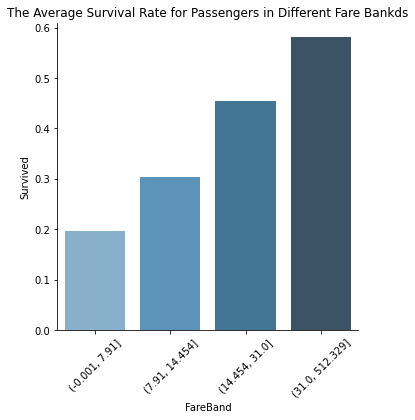

In [43]:
fareband_sort = train[['FareBand','Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand',ascending=True)
fareband_sort_plot = sns.catplot(x='FareBand',y='Survived',kind='bar', data=fareband_sort,palette="Blues_d")
fareband_sort_plot.set(title="The Average Survival Rate for Passengers in Different Fare Bankds")
plt.xticks(rotation=45)
plt.show()

Convert Fare feature to ordinal values based on FareBand feature.

In [44]:
for dataset in combine:
  dataset.loc[dataset['Fare']<=7.91,'Fare'] = 0
  dataset.loc[(dataset['Fare']>7.91) & (dataset['Fare']<=14.454),'Fare'] = 1
  dataset.loc[(dataset['Fare']>14.454) & (dataset['Fare']<=31),'Fare'] = 2
  dataset.loc[dataset['Fare']>31,'Fare'] = 3

In [45]:
train = train.drop(['FareBand'],axis=1)
combine = [train,test]

In [46]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0.0,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3.0,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1.0,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3.0,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1.0,NaN,0


In [47]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,2,0,0,330911,0.0,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2,1,0,363272,0.0,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,3,0,0,240276,1.0,NaN,2
3,895,3,"Wirz, Mr. Albert",0,1,0,0,315154,1.0,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,3101298,1.0,NaN,0


### Correcting by dropping features

By dropping features we are dealing with fewer data points, speeding up our notebook and easing the analysis.

Based on our assumptions and decisions, we want to drop the Cabin (correcting #2) and Ticket (correcting #1) features.

Note that where applicable we perform operations on both training and testing datasets together by stay consistent.

In [48]:
print('Before dropping Cabin and Ticket features', train.shape,test.shape)
train = train.drop(['Cabin','Ticket'],axis=1)
test = test.drop(['Cabin','Ticket'],axis=1)
print('After dropping Cabin and Ticket features', train.shape,test.shape)

Before dropping Cabin and Ticket features (891, 12) (418, 11)
After dropping Cabin and Ticket features (891, 10) (418, 9)


### Creating new feature extracting from existing ones

We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival rate, before dropping Name feature.

In the following code, we extract Title feature using regular expressions. The RegEx pattern `(\w+\.)` matches the first word which ends with ends with a dot character within Name feature. The `expand=False` flag returns a dataframe.

In [49]:
combine = [train,test]

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [50]:
pd.crosstab(train['Title'], train['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [51]:
pd.crosstab(test['Title'], test['Sex'])

Sex,0,1
Title,,
Col,2,0
Dona,0,1
Dr,1,0
Master,21,0
Miss,0,78
Mr,240,0
Mrs,0,72
Ms,0,1
Rev,2,0


We can replace many titles with a more common name or classify them as `Rare`.

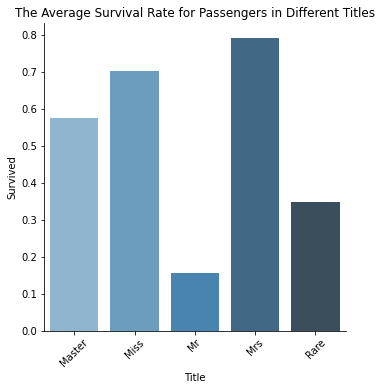

In [52]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
title_sort = train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()
title_plot =  sns.catplot(x='Title',y='Survived',kind='bar', data=title_sort,palette="Blues_d")
title_plot.set(title="The Average Survival Rate for Passengers in Different Titles")
plt.xticks(rotation=45)
plt.show()

We can convert the categorical title to ordinal.

In [53]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [54]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,0.0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,3.0,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,1.0,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,3.0,0,3
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,1.0,0,1


In [55]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",0,2,0,0,0.0,2,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2,1,0,0.0,0,3
2,894,2,"Myles, Mr. Thomas Francis",0,3,0,0,1.0,2,1
3,895,3,"Wirz, Mr. Albert",0,1,0,0,1.0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,1.0,0,3


Now we can safely drop the Name feature from training and testing datasets. We also do not need the PassengerId feature in the training dataset.

In [56]:
train = train.drop(['Name','PassengerId'],axis=1)
test_id = test['PassengerId']
test = test.drop(['Name','PassengerId'],axis=1)
combine = [train,test]
train.shape,test.shape

((891, 9), (418, 8))

**Observations**

When we plot Title, Age, and Survived, we note the following obsevations.

*  Most titles have band Age groups. For example, Master title has Age mean of 5 years;
*  Certain titles mostly survived (Miss, Mrs) or did not (Mr).

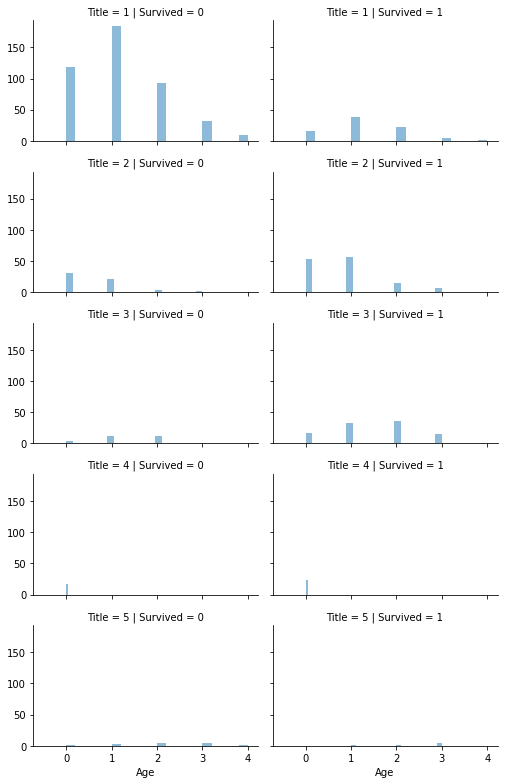

In [57]:
# "Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5
hist_title = sns.FacetGrid(train,col='Survived', row="Title",size=2.2,aspect=1.6)
hist_title.map(plt.hist,'Age', alpha = .5, bins=20)
hist_title.add_legend()

**Decisions**

We decide to retain the new Title feature for model training.

### Creating new feature combining existing features

We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [58]:
for dataset in combine:
  dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

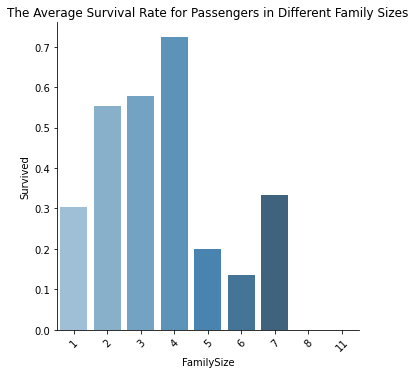

In [59]:
family_size_sort = train[['FamilySize','Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived',ascending=False)
family_size_plot = sns.catplot(x='FamilySize',y='Survived',kind='bar', data=family_size_sort,palette="Blues_d")
family_size_plot.set(title="The Average Survival Rate for Passengers in Different Family Sizes")
plt.xticks(rotation=45)
plt.show()

We can create another feature called IsAlone.

In [60]:
for dataset in combine:
  dataset['IsAlone'] = 0
  dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

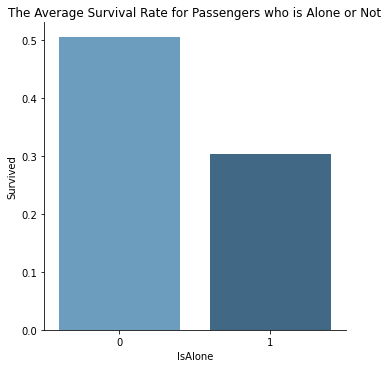

In [61]:
IsAlone = train[['IsAlone','Survived']].groupby(['IsAlone'], as_index=False).mean()
IsAlone_plot = sns.catplot(x='IsAlone',y='Survived',kind='bar', data=IsAlone,palette="Blues_d")
IsAlone_plot.set(title="The Average Survival Rate for Passengers who is Alone or Not")
plt.xticks(rotation=0)
plt.show()

Let's drop Parch, SibSp, and FamilySize features in favor of IsAlone.

In [62]:
train = train.drop(['Parch','SibSp','FamilySize'],axis=1)
test = test.drop(['Parch','SibSp','FamilySize'],axis=1)
combine = [train,test]

In [63]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0.0,0,1,0
1,1,1,1,2,3.0,1,3,0
2,1,3,1,1,1.0,0,2,1
3,1,1,1,2,3.0,0,3,0
4,0,3,0,2,1.0,0,1,1


We can also create an aritificial feature combining Pclass and Age.

In [64]:
for dataset in combine:
  dataset['Age*Class'] = dataset.Age * dataset.Pclass

In [65]:
train.loc[:,['Age*Class','Age','Pclass']].head()

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3


## MODEL, PREDICT AND SOLVE

Now we are ready to train a model and predict the required solution. There're 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Surived or not) with other variables or features (Sex, Age, Embarked ...). We are also performing a category of machine learning which is supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

*  Logistic Regression
*  Support Vector Machines
*  KNN or K-Nearest Neighbors
*  Gaussian Naive Bayes
*  Perception
*  Decision Tree
*  Random Forest


In [66]:
X_train = train.drop('Survived',axis=1)
Y_train = train['Survived']
X_test = test.copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

### Logistic Regression

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilites usign a logistic function, which is the cumulative logistic distribution. Reference [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression).

Note the confidence score genereated by the model based on the training dataset.

In [67]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
acc_log = round(logreg.score(X_train,Y_train)*100,2)
acc_log

79.24

We can use Logistic Regerssion to validate our assumptions and decisions for feature createing and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficient increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).
*  Sex is highest positive coefficient, implying as the Sex value increases (male:0 to female:1), the probability of Survived=1 increases the most;
*  Inversely as Pclass increases, probability of Survived=1 decreases the most;
*  This way Age*Class is a fair artificial feature to model as it has third highest negative correlation with Survived;
*  So is Title as second highest positive correlation.

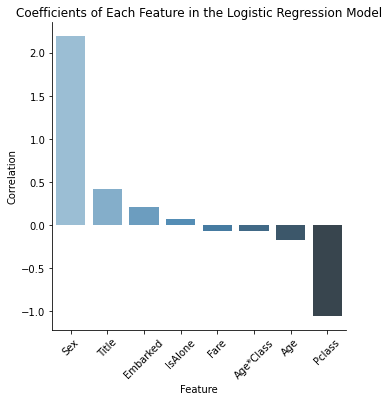

In [68]:
coef_df = pd.DataFrame(train.columns.delete(0))
coef_df.columns = ['Feature']
coef_df['Correlation'] = pd.Series(logreg.coef_[0])
coef_df_sort = coef_df.sort_values(by='Correlation', ascending=False)
coef_plot = sns.catplot(x='Feature',y='Correlation',kind='bar', data=coef_df_sort,palette="Blues_d")
coef_plot.set(title="Coefficients of Each Feature in the Logistic Regression Model")
plt.xticks(rotation=45)
plt.show()

### Support Vector Machines

Support Vector Machines are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. Reference [Wikepedia](https://en.wikipedia.org/wiki/Support_vector_machine).


In [69]:
svc = SVC()
svc.fit(X_train, Y_train)
acc_svc = round(svc.score(X_train,Y_train)*100,2)
acc_svc

82.94

### K-Nearst Neighbor

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the same being assigned to the class most common among its k nearest neighbors (k is a positive integer, typicall small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. Reference [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

In [70]:
knn = KNeighborsClassifier(n_neighbors=3) # ? n_neighbors
knn.fit(X_train, Y_train)
acc_knn = round(knn.score(X_train,Y_train)*100,2)
acc_knn

83.39

### Gaussian Naive Bayes

In machine learning, naive Bayes classifier are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in learning problem. Reference [Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier).

In [71]:
gaussian = GaussianNB()
gaussian.fit(X_train,Y_train)
acc_gaussian = round(gaussian.score(X_train,Y_train)*100,2)
acc_gaussian

76.88

### Perceptron

The perceptron is an algorithm for supervised learning of binary classifier (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, it that it processes elements in the training set one at a time. Reference [Wikipedia](https://en.wikipedia.org/wiki/Perceptron).

In [72]:
perceptron = Perceptron()
perceptron.fit(X_train,Y_train)
acc_perceptron = round(perceptron.score(X_train,Y_train)*100,2)
acc_perceptron

67.9

### Decision Tree

Decision tree is a predictive model which maps features (tree branches) to conclusion about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification tree; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision tress where the target variable can take continuous values (typically real numbers) are called regression trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning).



In [73]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
acc_decision_tree = round(decision_tree.score(X_train,Y_train)*100,2)
acc_decision_tree

87.43

### Random Forest

Random forests or random decision forest are an ensemble learning method for classification, regression, and other tasks, that operate by constructing a multitude of decision trees (n_estimators) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Random_forest).

In [74]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,Y_train)
acc_random_forest = round(random_forest.score(X_train,Y_train)*100,2)
acc_random_forest

87.43

### Model evaluation

We can now rank our evaluation of all the models to choose the best for our problem. 

In [75]:
models = pd.DataFrame({
    'Model':['Support Vector Machines', 'KNN', 'Logistic Regression','Random Forest','Naive Bayes','Perceptron','Decision Tree'],
    'Score':[acc_svc,acc_knn,acc_log,acc_random_forest,acc_gaussian,acc_perceptron,acc_decision_tree]
})

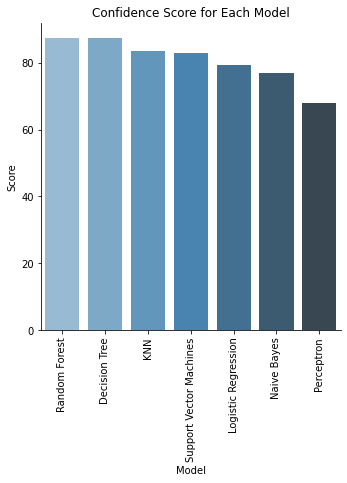

In [76]:
models_sort =  models.sort_values(by='Score',ascending=False)
model_plot = sns.catplot(x='Model',y='Score',kind='bar', data=models_sort,palette="Blues_d")
model_plot.set(title="Confidence Score for Each Model")
plt.xticks(rotation=90)
plt.show()

While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set.

### Prediction

In [77]:
Y_pred = random_forest.predict(X_test)
Y_pred = pd.DataFrame(Y_pred)

# SAVE THE OUTPUT IN CSV FORMAT

In [78]:
from google.colab import drive
drive.mount('drive')

In [79]:
output = test_id.to_frame().merge(Y_pred,how='left',left_index=True,right_index=True).set_index('PassengerId').rename(columns={0:'Survived'})
output
output.to_csv('kaggle_sub_py_4.csv')
!cp kaggle_sub_py_4.csv "/content/drive/MyDrive/ColabNotebooks/"

## PUBLISH 

In [82]:
%%shell
jupyter nbconvert --to html /content/sample_data/kaggle_titanic_DataScienceWorkflow.ipynb

[NbConvertApp] Converting notebook /content/sample_data/kaggle_titanic_DataScienceWorkflow.ipynb to html
[NbConvertApp] Writing 779124 bytes to /content/sample_data/kaggle_titanic_DataScienceWorkflow.html
